<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 구성하는 절차
1. 더미데이터 준비
2. 훈련용(train), 검증용(val), 테스트용(test)으로 구분
3. 심층생성(Dense)
4. 모델에 적용(Sequential)
5. 컴파일진행(최적화기법 적용_adam)
6. 훈련시작 fit()
7. 검증(evaluate)

# 손실곡선
- fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인할 수 있게하는 것
    - 에포크횟수, 손실, 정확도등
    - 출력메시지 : <keras.src.callbacks.history.History at 0x78eda6421d80>
        - 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력
        - History 라는 클래스 객체를 반환(훈련과정의 지표, 손실, 정확도등 내장) => 그래프 시각화가능

# 데이터

In [35]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() # 테라스 버전오류 완화용

In [ ]:
from tensorflow import keras

# \ : 엔터효과 제거용_한줄로 긴 문장을 자름
(train_input, train_target), (test_input, test_target) =\
             keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target =\
             train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [37]:
print("test : ", test_input.shape, test_target.shape)
print("tain : ", train_scaled.shape, train_target.shape)
print("val  : ", val_scaled.shape, val_target.shape)

test :  (10000, 28, 28) (10000,)
tain :  (48000, 28, 28) (48000,)
val  :  (12000, 28, 28) (12000,)


# 심층신경망 생성 메서드

In [38]:
# 모델을 만드는 간단한 함수를 정의(하나의 매개변수를 받아 리턴)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))    #입력층
    model.add(keras.layers.Dense(100, activation='relu'))   #은닉층

    # model_fn()함수에 (a_layer 매개변수로) 케라스층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# 모델생성

In [39]:
model = model_fn()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#                                  다중분류                  정확도
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련과정확인(verbose) 및 저장
- 훈련과정 출력을 조절함
- verbose = 0 : 훈련과정 출력x,
- verbose = 1 : 기본값, 에포크마다 진행 막대와 함께 손실등의 지표를 출력
- verbose = 2 : 진행막대 빼고 출력

In [41]:
# fit() 메서드 겨로가를 history 변수에 담음
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [42]:
# histroy 딕셔너리로 존재 : accuracy : 정확도 / loss : 손실도
print(history.history.keys())

# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가했기때문에 histroy 속성에 포함

dict_keys(['accuracy', 'loss'])


In [43]:
print("accuracy : ", history.history['accuracy'])
print("loss     : ", history.history['loss'])
# 2차원[정확도, 손실] -> 그래프 시각화 가능

accuracy :  [0.8112499713897705, 0.8592708110809326, 0.8734791874885559, 0.8821874856948853, 0.8893541693687439]
loss     :  [0.5311374068260193, 0.39054960012435913, 0.35127100348472595, 0.3286345899105072, 0.31178048253059387]


## 훈련과정 시각화

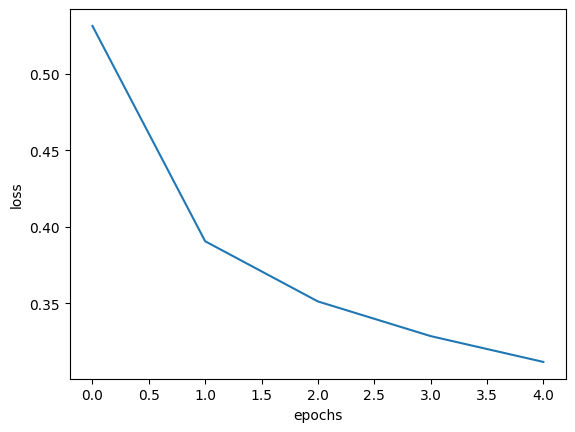

In [44]:
#손실률
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정화도는 에포크마다 계산한 값이 순서대로 나열된 단순 리스트로 그래프 시각화가능

plt.plot(history.history['loss'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값
plt.show()
# 꺽어지는 부분을 잘 봐야함(에포트 : 1.0, 2.0)


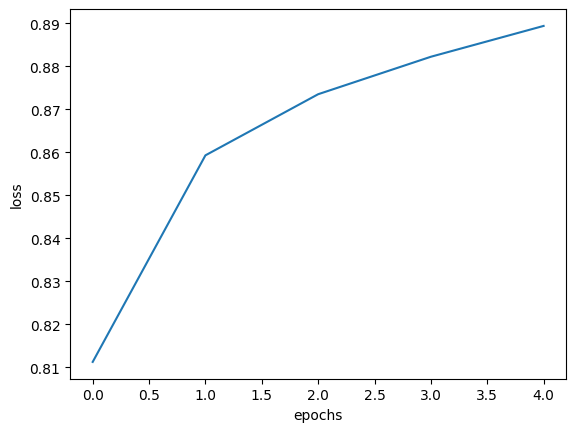

In [45]:
# 정확도
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값
plt.show()
# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상함

# 재훈련(epochs 조정)
- 5번 -> 20번 증가

In [46]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

In [47]:
print("accuracy : ", history.history['accuracy'])
print("loss     : ", history.history['loss'])

accuracy :  [0.8109166622161865, 0.856458306312561, 0.8705624938011169, 0.8796666860580444, 0.8876041769981384, 0.8932083249092102, 0.8971458077430725, 0.9027291536331177, 0.9054166674613953, 0.909250020980835, 0.9116458296775818, 0.9147291779518127, 0.9164583086967468, 0.9180833101272583, 0.9192500114440918, 0.9223541617393494, 0.9248124957084656, 0.9255416393280029, 0.9270625114440918, 0.9283333420753479]
loss     :  [0.5377466082572937, 0.39828646183013916, 0.3585483729839325, 0.3345600366592407, 0.31714928150177, 0.3031317889690399, 0.2918485701084137, 0.28093406558036804, 0.2728918194770813, 0.26659029722213745, 0.2604311406612396, 0.2539425194263458, 0.24947060644626617, 0.24347759783267975, 0.23914147913455963, 0.23472851514816284, 0.22885528206825256, 0.2262561172246933, 0.22153089940547943, 0.2187170386314392]


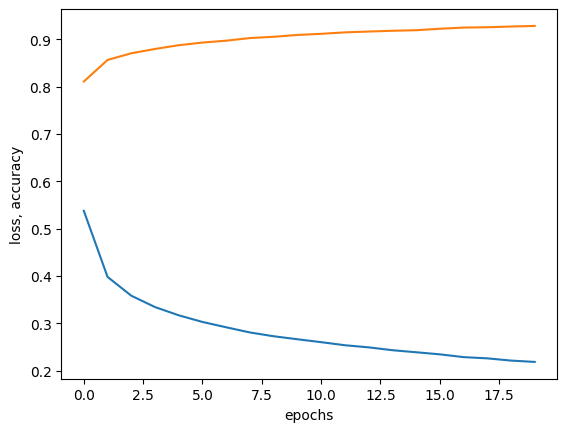

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss, accuracy')      # 손실된 값
plt.show()

# 검증손실
- 인공신경망 : 경사하강법 이용(과대/과소적합 & 에포크사이의 관계 존재)
    - 훈련세트점수, 검증세트 점수필요
    - 단, 손실과 정확도만으로는 파악이 어려움

# keypoint
- 손실을 사용하는 것과 정확도를 사용하는 것의 차이?
    - 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수임
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있는데 모델이 잘 훈련되었는지 판단하려면 정확도보다는 **손실 함수의 값을 확인**하는 것이 더 좋은 방법임

In [49]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9003 - loss: 0.2868 -

In [50]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## 검증손실 시각화

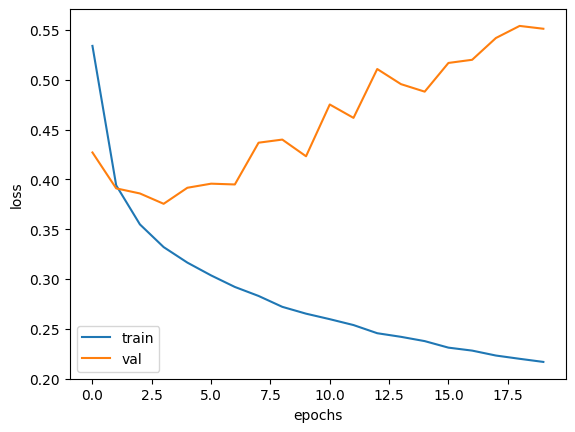

In [51]:
# 과대, 과소적합 문제를 조사하기 위해서 훈련손실, 검증 손실을 한 그래프시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값

plt.legend(["train", "val"])
plt.show()
# 심하게 뛰는 것들은 사용하면x => 과대적합

# 결론
- 초기에 검증 손실이 감소하다가 5번 에포크만에 다시 상승함
- 훈련손실은 꾸준히 감소하기 때문에 **과대적합 모델**이 만들어짐
- 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 거 같다

# 개선
- 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드룹아웃)을 사용

# 최적화실행

## RMSprop

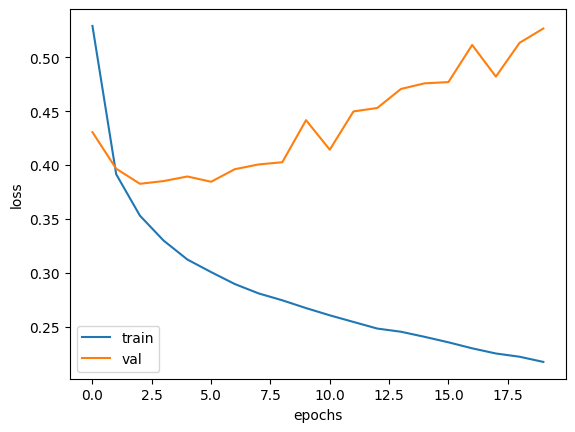

In [52]:
#옵티마이져 하이퍼파라미터를 조정하여 과대적합 완화시도
model = model_fn()
model.compile(optimizer="RMSprop", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값

plt.legend(["train", "val"])
plt.show()

## Adagrad

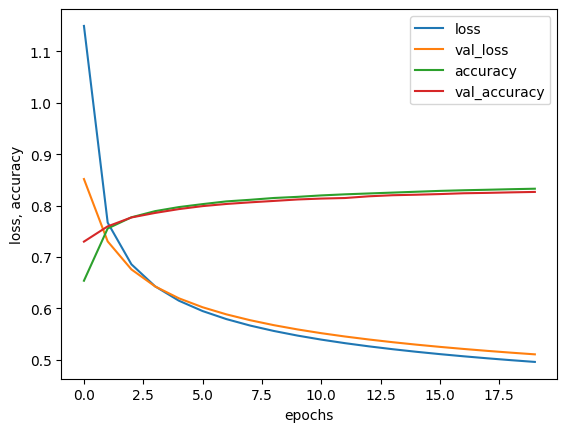

In [53]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss, accuracy')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()

## adam

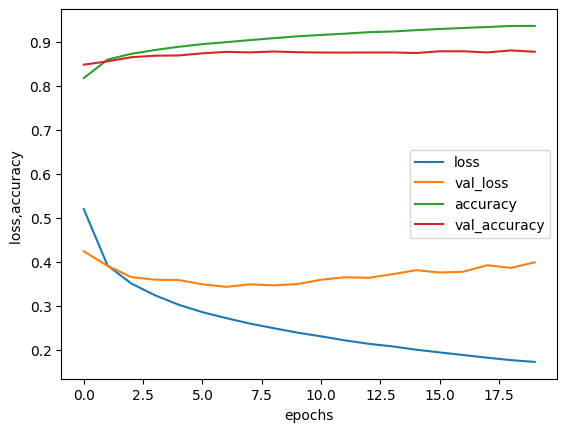

In [54]:
model = model_fn()
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss,accuracy ')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()

# 드롭 아웃(DropOut)
- 딥러닝의 기초가 되는 제프리 힌턴이 소개
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런 출려을 0으로 만듬) 과대 적합을 막음
- 어떤 생플을 처리할때, 은닉층의 n번째 뉴런이 드룹아웃되면 h_n출력이 없음
    - 뉴런은 랜덤하게 드룹아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임
<br/><br/>
- 과대적합을 막을 수 있는 이유
    - 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 관대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
    - 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

# 또다른 분석
- 앞의 드룹아웃이 적용된 2개의 신경망 그림을 보면 드룹아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 됨
    - 앙상블 : 더 좋은 예측을 만들기 위해 여러 개의 모델을 3번 훈련하는 머신러닝 알고리즘(과대적합 방지)

- keras.layers.Dropout
    - 어떤 층의 뒤에 드룹아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬
    - 드룹아웃이 층처럼 사용되지만 룬련되는 파라미터는 없음

<img src = "https://velog.velcdn.com/images/s_gyu/post/2d526294-c106-4c06-bec1-00a5b523fecb/image.png" width=400px>
<img src="https://blog.kakaocdn.net/dn/bopdjH/btrbIHWapn7/rpSeKkhd6TPiDtnOMbpig0/img.png" width=280px>

In [55]:
# model_fn() 함수에 드룹 아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3))# 30%정도 드룹아웃

model.summary()
# 은닉층 뒤에 추가된 드룹아웃층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력, 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 주의사항
- 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드룹아웃을 적용하지 않는다.
- 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
- 텐서플로와 케라스는 모델을 평가 예측에 사용할때 자동으로 드룹아웃을 적용하지 않음

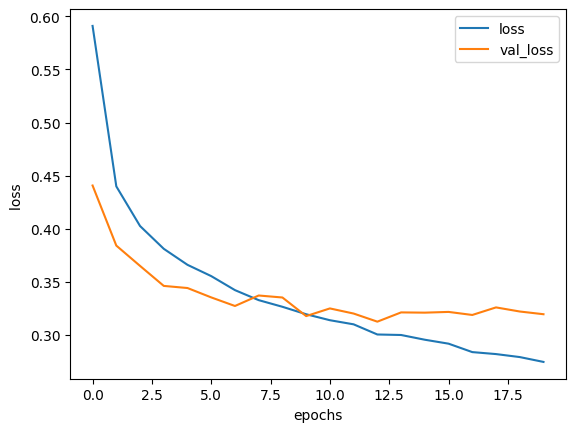

In [56]:
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

#드룹아웃적용시 validation_data으로 val값을 넣야함
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss,accuracy ')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()
# 과대적합이 확실이 줄어듬
# 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지는 않음
# 20번 에포트를 실행하서 결국 과대적합이 되었음-> 10번만 하자

# .save() : 모델저장
- 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드존재
- [텐서플로의 체크포인트 포멧으로 저장하지만](https://www.tensorflow.org/guide/checkpoint?hl=ko)
- 확장자가 .h5일 경우 [HDF5](https://geunuk.tistory.com/466) 포멧으로 저장함
    - HDF5 : 대용량의 데이터를 저장하기 위한 파일 형식

In [58]:
# 차우에 재활용하기 위해서 모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

#드룹아웃적용시 validation_data으로 val값을 넣야함
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole.keras') #모델저장
model.save_weights('model.weights.h5') #HDF5 형식으로 저장(폴더에서 확인)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
# 저장한 모델 호출 및 테스트 진행
!ls -al model*
# ! : 리눗스 명령어사용
# ls : 리스트출력

-rw-r--r-- 1 root root 971928 Jan 10 05:51 model.weights.h5
-rw-r--r-- 1 root root 974768 Jan 10 05:51 model-whole.keras


## 실험1 (load_weights())
- 훈련하지 않은 새로운 모델을 만들고 model.weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용
- save_weight()와 쌍을 이루는 load_weights() 메서드
- 주의사항 : load_weights() 메서드를 사용할려면 save_weight() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야함

In [63]:
# 동일한 모델 생성
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5') #이전에 저장했던 모델 파라미터 모델

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 검증(실험1)

In [64]:
import numpy as np
# predict() 메서드사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 수는 12,000개이기때문에
# predict()메서드는 (12,000, 10)크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도 파악
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis - -1배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5 x 3배열에 axis = 1로 한값과 axis=0으로 한 값의 인덱스로 반환

# argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이되고 다르면 0이 됨
# 이를 평균으로 출력(정확도)
print(np.mean(val_labels == val_target))

# axis = 1 : 열에 따라 각 행의 최대값의 인덱스 반환
# axis = 0 : 행에 따라 각 열의 최대값의 인덱스 반환
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
#  -> 두배열에서 각 위치의 값이 같으면 1, 다르면 0(평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8820833333333333


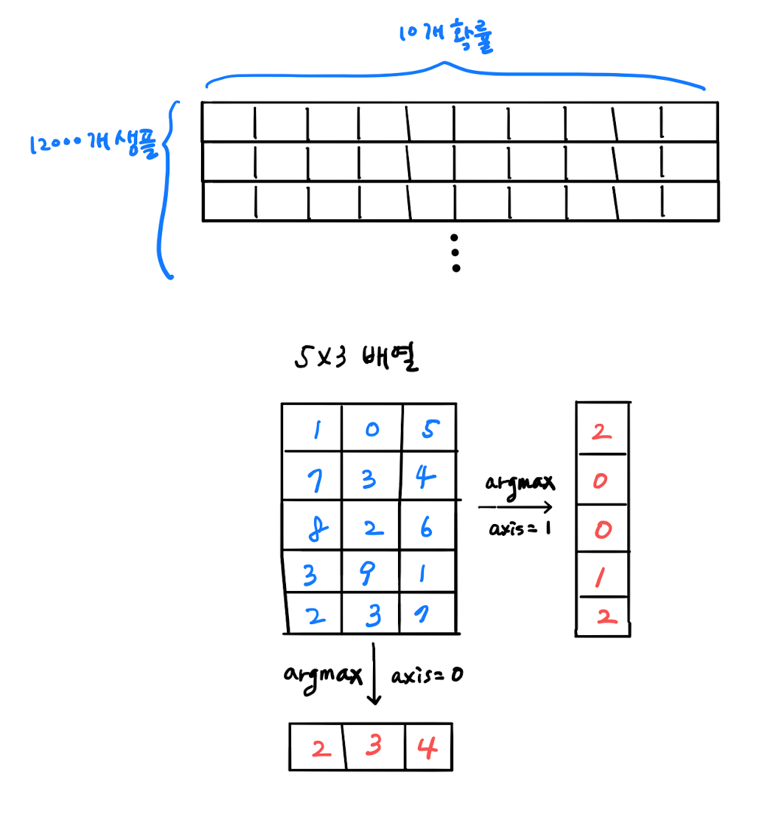

## 실험 1_2(keras)

In [65]:
# load_model()저장된 케라스 파일 읽기
model = keras.models.load_model('model-whole.keras')

# 같은 모델을 불러 들였기 때문에 위와 정확도가 같음
model.evaluate(val_scaled, val_target)

# 현 상태 분석 : 20번 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 앟은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해보자 -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3245


[0.3234425485134125, 0.8820833563804626]

## 실험2
- 파일로 새로운 모델을 만들고 바로 사용
- 추가적으로 콜백을 이용

### 콜백
- 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
    - keras.callback 패키지
    - fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
- ModelCheckpoint 콜백 : 에포크마다 모델을 저장
    - save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수(최상)를 만드는 모델을 저장

In [80]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

#드룹아웃적용시 validation_data으로 val값을 넣야함
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
            validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# 모델훈련후 best_model.keras의 최상의 검증 점수를 낸 모델이 저장

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


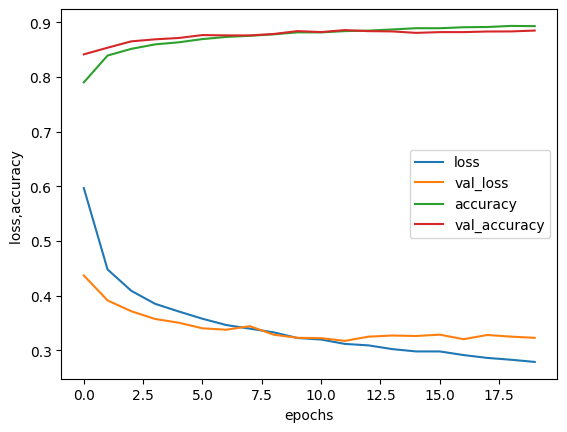

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss,accuracy ')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()

In [82]:
model= keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled, val_target)
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동을 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.3156


[0.31698042154312134, 0.8857499957084656]

### 조기종료(early stopping)
- 에포크의 횟수를 제한하는 역할 & 과대적합방지
    - 사실 검증 점수가 상승하기 시작하면 그 아래로는 떨어지지 않기에
- 훈련을 종료하여 자원과 시간을 아낄수 있음
<br/><br/>
- 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
    - patience 매개변수 : 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
        - ex) patience=2 : 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지(patience : 인내심)
    - restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

In [72]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

#가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
            validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
print("조기종료시점 epochs : ", early_stopping_cb.stopped_epoch)

조기종료시점 epochs :  7


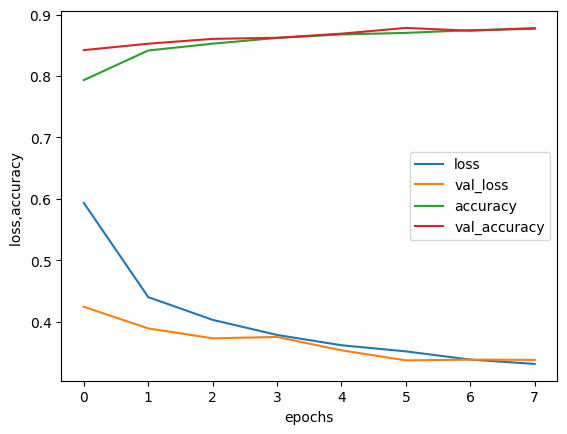

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.3364


[0.33720460534095764, 0.878250002861023]

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss,accuracy ')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()

model.evaluate(val_scaled, val_target)
# 검증 : 0.3372 / 0.8783 / 에포크 : 7번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해 준다는 것